# Lib

In [1]:
import torch 
import torch.nn as nn 
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np 
import os 
import glob
import seaborn as sns 
import pandas as pd


In [4]:
x = '10'
x.replace('.','')

'10'

# Func

In [4]:
def check_data(data):
    for k,v in data.items():
        if isinstance(v,np.ndarray):
            print(k,v.shape)
        else:
            try:
                print(k, 'Length: ', len(v))
            except:
                print(k, v)

def load_data(path):
    data = np.load(path,allow_pickle=True).item()
    return data 

# Eval

## Eval Noise

In [9]:
def parse_dir(path,keywords=[], banwords=[]):
    list_data_path = []
    for p in glob.glob(path+'/*.npy'):
        tmp_p = p.split('/')[-1]
        # tmp_p = tmp_p.split('-')
        has_keywords = True
        for keyword in keywords:
            has_keywords = has_keywords and (keyword in tmp_p)
        for banword in banwords:
            has_keywords = has_keywords and (banword not in tmp_p)
        if has_keywords:
            list_data_path.append(p)
    return list_data_path 

In [10]:
def get_noise_eval_data(path):
    data = load_data(path)
    res = {}
    n_agent = len(data['first_done']) 
    res['name'] = data['name']
    res['noise level'] = data['noise_level']
    res['noise type'] = data['noise_type']

    list_stability, list_tracking_error, list_path_length = [], [], []
    list_action_fluctation, list_cot = [], []
    list_fall_rate = []
    # check_data(data)
    for i in range(n_agent):
        first_done = data['first_done'][i]
        tracking_error = data['tracking_error'][i]
        vel_roll = data['base_vel_roll'][i]
        vel_pitch = data['base_vel_pitch'][i]
        stability = np.sqrt(np.square(vel_roll) + np.square(vel_pitch))
        action_fluctutation = data['action_fluctation'][i]
        cot = data['cost_of_transport'][i]

        list_path_length.append(first_done)
        list_fall_rate.append(data['Fall'][i])
        list_stability.append(np.mean(stability))
        list_tracking_error.append(np.mean(tracking_error))
        list_action_fluctation.append(np.mean(action_fluctutation))
        list_cot.append(np.mean(cot))

    list_stability = np.array(list_stability)
    list_tracking_error = np.array(list_tracking_error)
    list_path_length = np.array(list_path_length)
    list_fall_rate = np.array(list_fall_rate)
    list_action_fluctation = np.array(list_action_fluctation)
    list_cot = np.array(list_cot)

    res['stability'] = list_stability
    res['tracking_error'] = list_tracking_error
    res['path_length'] = list_path_length
    res['fall_rate'] = list_fall_rate
    res['action_fluctation'] = list_action_fluctation
    res['cot'] = list_cot
    
    return res  



In [11]:
def get_push_eval_data(path):
    data = load_data(path)
    res = {}
    n_agent = len(data['first_done']) 
    res['name'] = data['name']
    res['max force'] = data['max_force']
    res['push interval'] = data['push_interval']

    list_stability, list_tracking_error, list_path_length = [], [], []
    list_action_fluctation, list_cot = [], []
    list_fall_rate = []
    # check_data(data)
    for i in range(n_agent):
        first_done = data['first_done'][i]
        tracking_error = data['tracking_error'][i]
        vel_roll = data['base_vel_roll'][i]
        vel_pitch = data['base_vel_pitch'][i]
        stability = np.sqrt(np.square(vel_roll) + np.square(vel_pitch))
        action_fluctutation = data['action_fluctation'][i]
        cot = data['cost_of_transport'][i]

        list_path_length.append(first_done)
        list_fall_rate.append(data['Fall'][i])
        list_stability.append(np.mean(stability))
        list_tracking_error.append(np.mean(tracking_error))
        list_action_fluctation.append(np.mean(action_fluctutation))
        list_cot.append(np.mean(cot))

    list_stability = np.array(list_stability)
    list_tracking_error = np.array(list_tracking_error)
    list_path_length = np.array(list_path_length)
    list_fall_rate = np.array(list_fall_rate)
    list_action_fluctation = np.array(list_action_fluctation)
    list_cot = np.array(list_cot)

    res['stability'] = list_stability
    res['tracking_error'] = list_tracking_error
    res['path_length'] = list_path_length
    res['fall_rate'] = list_fall_rate
    res['action_fluctation'] = list_action_fluctation
    res['cot'] = list_cot
    
    return res
    

In [12]:
def get_df(list_data:list):
    list_df = []
    for data in list_data:
        df = pd.DataFrame(data)
        list_df.append(df) 
    df = pd.concat(list_df) 
    return df

In [13]:
def plot_df(df, y_name, x_name, hue_name, save_path, y_label, x_label, title, ylim=None, xlim=None, 
                  remove_outliers = False,
                  plot_type = 'box',
                  title_fontsize=22, label_fontsize=22, legend_fontsize=16, legend_location='upper left', save_name = 'Eval'):
    if remove_outliers:
        Q1 = df[y_name].quantile(0.25)
        Q3 = df[y_name].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[y_name] < (Q1 - 1.5 * IQR)) |(df[y_name] > (Q3 + 1.5 * IQR)))]

    fig, ax = plt.subplots(figsize=(12,8))
    sns.set_style("darkgrid")
    if plot_type == 'box':
        box = sns.boxplot(data=df, x=x_name, y=y_name, hue=hue_name, ax=ax)
    elif plot_type == 'bar':
        box = sns.barplot(data=df, x=x_name, y=y_name, hue=hue_name, ax=ax)
    
    ax.set_ylabel(y_label, fontsize=label_fontsize)
    ax.set_xlabel(x_label, fontsize=label_fontsize)
    ax.set_title(title, fontsize=title_fontsize)
    ax.tick_params(axis='both', labelsize=legend_fontsize)
    if ylim is not None:
        ax.set_ylim(ylim)
    if xlim is not None:
        ax.set_xlim(xlim)
    
    # plt.legend(bbox_to_anchor=(1.15, 0.8), loc=legend_location, borderaxespad=0., fontsize=legend_fontsize)
    plt.legend(loc=legend_location, borderaxespad=0., fontsize=legend_fontsize)
    
    plt.tight_layout()
    if save_path is not None:
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        save_path = os.path.join(save_path, save_name+'.pdf')
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

## Noise Eval

In [39]:
noiseV05_data_path = parse_dir("logs/Eval/noiseV05",['uniform','wReward'])
noiseV05_data = [get_noise_eval_data(p) for p in noiseV05_data_path]
noiseV05_df = get_df(noiseV05_data)

In [40]:
noiseV05_df.describe()

,noise level,stability,tracking_error,path_length,action_fluctation,cot
count,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,5.50000,1.053088,0.222874,850.097000,2.623728,0.951493
std,2.87264,0.567547,0.150702,291.968796,1.121544,0.823193
min,1.00000,0.178148,0.035609,41.000000,0.768183,0.159911
25%,3.00000,0.564579,0.095748,1000.000000,1.699815,0.373956
50%,5.50000,1.001319,0.182077,1000.000000,2.572564,0.663115
75%,8.00000,1.503389,0.319695,1000.000000,3.474824,1.270171
max,10.00000,2.512952,0.760643,1000.000000,5.103599,6.117390


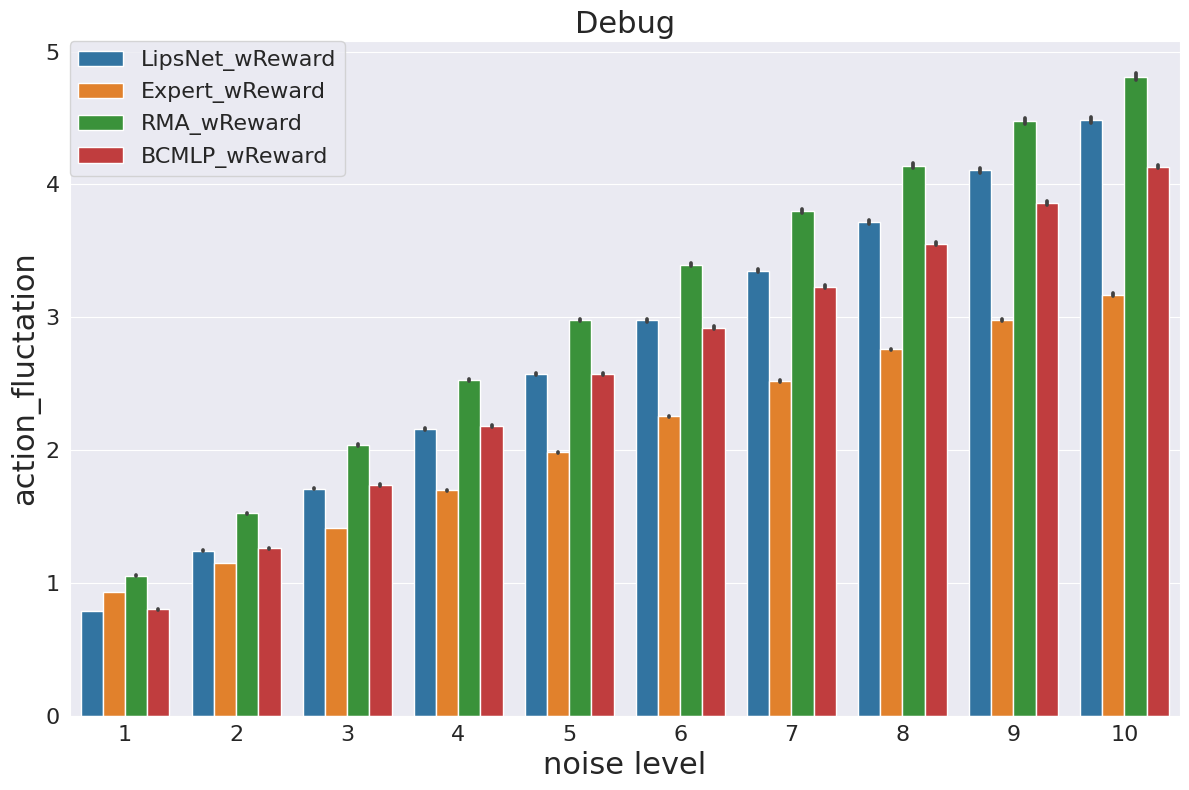

In [41]:
plot_df(
    noiseV05_df,
    y_name = 'action_fluctation',
    x_name = 'noise level',
    hue_name = 'name',
    save_path=None,
    y_label='action_fluctation',
    x_label='noise level',
    title="Debug",
    plot_type = 'bar'
)

In [31]:
noiseV10_data_path = parse_dir("logs/Eval/noiseV10",['guassian','wReward'])
noiseV10_data = [get_noise_eval_data(p) for p in noiseV05_data_path]
noiseV10_df = get_df(noiseV05_data)

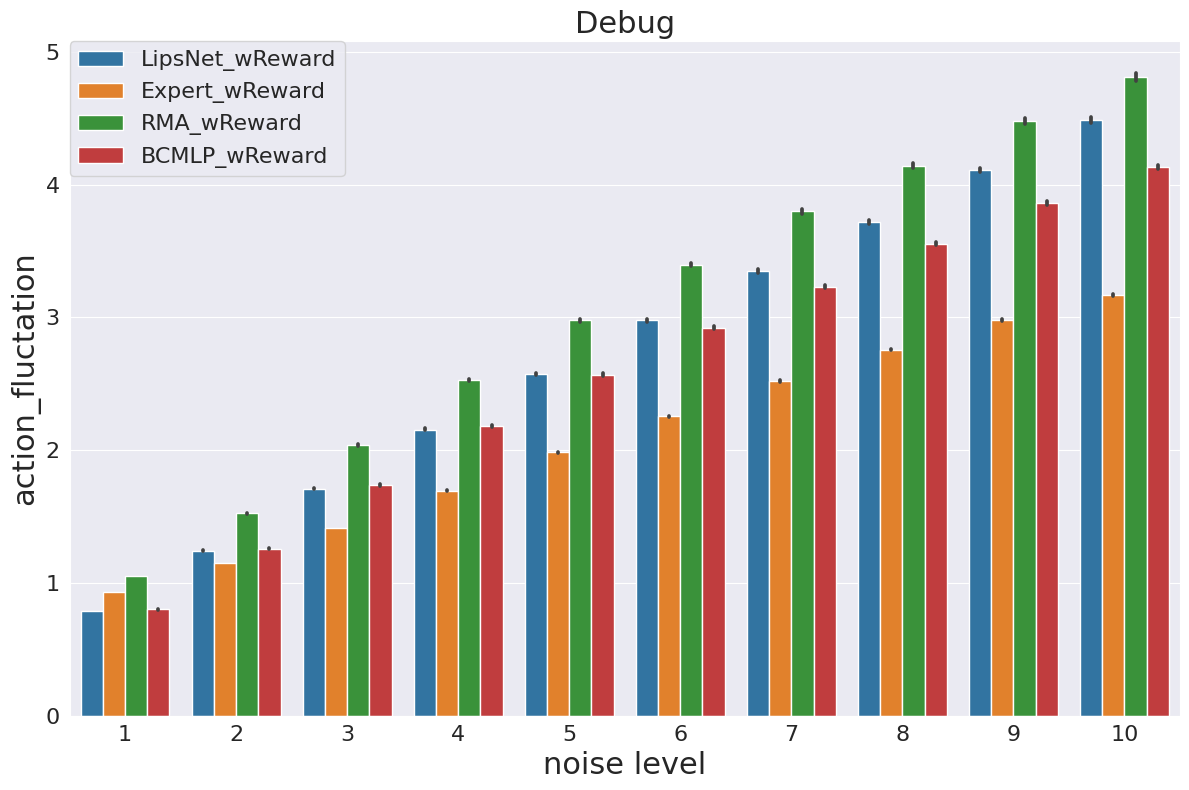

In [32]:
plot_df(
    noiseV10_df,
    y_name = 'action_fluctation',
    x_name = 'noise level',
    hue_name = 'name',
    save_path=None,
    y_label='action_fluctation',
    x_label='noise level',
    title="Debug",
    plot_type = 'bar'
)

In [42]:
pushV05_data_path = parse_dir("logs/Eval/pushV05",['push_interval-10'])
pushV05_data = [get_push_eval_data(p) for p in pushV05_data_path]
pushV05_df = get_df(pushV05_data)

In [43]:
pushV05_df.describe()

,max force,push interval,stability,tracking_error,path_length,action_fluctation,cot
count,1900.000000,1900.0,1900.000000,1900.000000,1900.0,1900.000000,1900.000000
mean,29.473684,10.0,0.191042,0.054732,1000.0,0.680155,0.244097
std,14.321107,0.0,0.080683,0.014795,0.0,0.154900,0.080061
min,10.000000,10.0,0.094162,0.026544,1000.0,0.485245,0.150737
25%,20.000000,10.0,0.111543,0.043059,1000.0,0.516789,0.177062
50%,30.000000,10.0,0.186970,0.051712,1000.0,0.794460,0.239017
75%,40.000000,10.0,0.302126,0.068272,1000.0,0.836871,0.306548
max,50.000000,10.0,0.338061,0.092482,1000.0,0.856314,1.052454


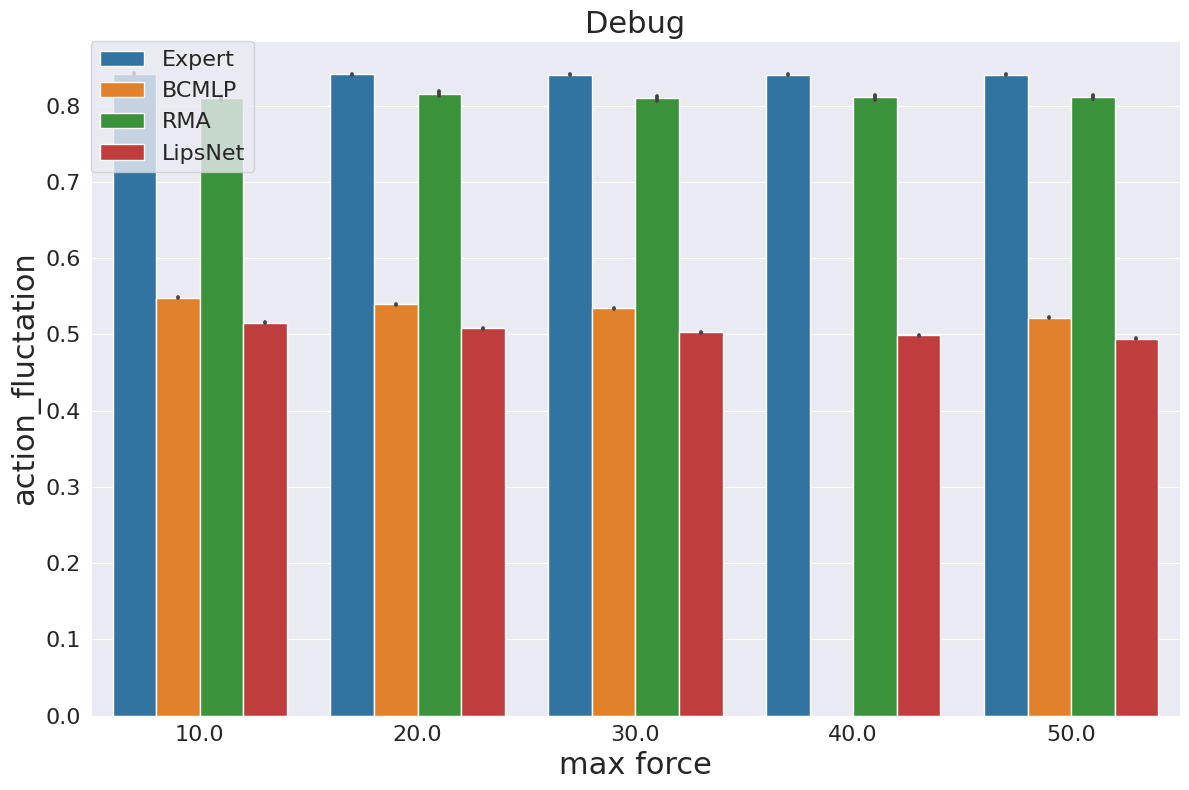

In [44]:
plot_df(
    pushV05_df,
    y_name = 'action_fluctation',
    x_name = 'max force',
    hue_name = 'name',
    save_path=None,
    y_label='action_fluctation',
    x_label='max force',
    title="Debug",
    plot_type = 'bar'
)